In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt


In [3]:
PATH = 'data/'

### Разделим данные на тренировочные, валидационные и тестовые

In [4]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

In [5]:
train_lefthand_dir = os.path.join(train_dir, 'class_0')  
train_righthand_dir = os.path.join(train_dir, 'class_1')  
train_lefttilt_dir = os.path.join(train_dir, 'class_2')  
train_righttilt_dir = os.path.join(train_dir, 'class_3')  
train_leftwalk_dir = os.path.join(train_dir, 'class_4')  
train_rightwalk_dir = os.path.join(train_dir, 'class_5')  

validation_lefthand_dir = os.path.join(validation_dir, 'class_0')  
validation_righthand_dir = os.path.join(validation_dir, 'class_1')  
validation_lefttilt_dir = os.path.join(validation_dir, 'class_2')  
validation_righttilt_dir = os.path.join(validation_dir, 'class_3')  
validation_leftwalk_dir = os.path.join(validation_dir, 'class_4')  
validation_rightwalk_dir = os.path.join(validation_dir, 'class_5')  

In [6]:
num_lh_tr = len(os.listdir(train_lefthand_dir))
num_rh_tr = len(os.listdir(train_righthand_dir))
num_lt_tr = len(os.listdir(train_lefttilt_dir))
num_rt_tr = len(os.listdir(train_righttilt_dir))
num_lw_tr = len(os.listdir(train_leftwalk_dir))
num_rw_tr = len(os.listdir(train_rightwalk_dir))


num_lh_val = len(os.listdir(validation_lefthand_dir))
num_rh_val = len(os.listdir(validation_righthand_dir))
num_lt_val = len(os.listdir(validation_lefttilt_dir))
num_rt_val = len(os.listdir(validation_righttilt_dir))
num_lw_val = len(os.listdir(validation_leftwalk_dir))
num_rw_val = len(os.listdir(validation_rightwalk_dir))

total_train = num_lh_tr + num_rh_tr + num_lt_tr + num_rt_tr + num_lw_tr + num_rw_tr
total_val = num_lh_val + num_rh_val + num_lt_val + num_rt_val + num_lw_val + num_rw_val

### Выведем сколько тренировочных данных и данных для валидации

In [7]:
print('total training left hand images:', num_lh_tr)
print('total training right hand images:', num_rh_tr)
print('total training left tilt images:', num_lt_tr)
print('total training right tilt images:', num_rt_tr)
print('total training left walk images:', num_lw_tr)
print('total training right walk images:', num_rw_tr)
print("----------------------------------------------------")
print('total validation left hand images:', num_lh_val)
print('total validation right hand images:', num_rh_val)
print('total validation left tilt images:', num_lt_val)
print('total validation right tilt images:', num_rt_val)
print('total validation left walk images:', num_lw_val)
print('total validation rigth walk images:', num_rw_val)
print("----------------------------------------------------")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training left hand images: 220
total training right hand images: 179
total training left tilt images: 193
total training right tilt images: 193
total training left walk images: 179
total training right walk images: 233
----------------------------------------------------
total validation left hand images: 10
total validation right hand images: 10
total validation left tilt images: 10
total validation right tilt images: 10
total validation left walk images: 10
total validation rigth walk images: 10
----------------------------------------------------
Total training images: 1197
Total validation images: 60


Данных для валиации примерно 5%

### Определим критерии для нейронной сети

In [8]:
batch_size = 16
epochs = 4
IMG_HEIGHT = 480
IMG_WIDTH = 480

### Нормализуем векторы для нейронной сети

In [9]:

train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

### После определения генераторов для обучающих и проверочных изображений метод flow_from_directory загружает изображения с диска, применяет масштабирование и изменяет размеры изображений до требуемых размеров.

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 1197 images belonging to 6 classes.


In [11]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 60 images belonging to 6 classes.


In [12]:
test_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 120 images belonging to 6 classes.


### Данные для бучения перемешаны (shuffle = True), выведем первые 5 изображений

In [13]:
sample_training_images, _ = next(train_data_gen)

In [14]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

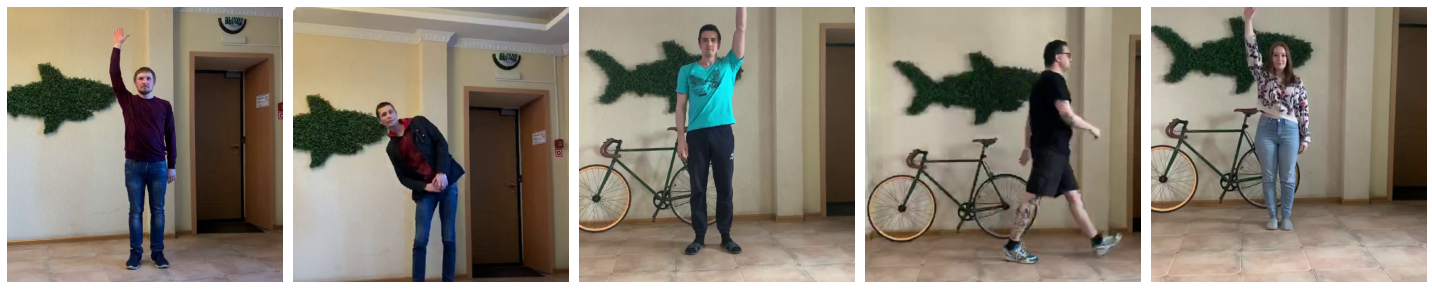

In [15]:
plotImages(sample_training_images[:5])

### Построим модель сверточной нейронной сети с тремя сверточными слоями (Conv) и соответсвенно с тремя слоями субдискретизации (MaxPooling). За ними идет слой выравнивания Flatten(), 2 скрытых слоя и слой с функцией активации softmax

In [15]:

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
#     Conv2D(32, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(6, activation='softmax')
])

### Для компиляции модели используются три параметра: оптимизатор (optimizer), потери (loss) и показатели (metrics)

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False, name='categorical_crossentropy'),
              metrics=['accuracy'])

### Отобразим модель нейронной сети

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 480, 480, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 240, 240, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 240, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 120, 16)      2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

### Запустим обучение

In [18]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

# history = model.fit(train_data_gen, epochs=4, validation_data=val_data_gen).



Epoch 1/4
74/74 [==============================] - 113s 2s/step - loss: 1.4213 - accuracy: 0.3844 - val_loss: 0.7149 - val_accuracy: 0.7292
Epoch 2/4
74/74 [==============================] - 116s 2s/step - loss: 0.3578 - accuracy: 0.8569 - val_loss: 0.1755 - val_accuracy: 0.9375
Epoch 3/4
74/74 [==============================] - 116s 2s/step - loss: 0.0636 - accuracy: 0.9797 - val_loss: 0.0881 - val_accuracy: 0.9583
Epoch 4/4
74/74 [==============================] - 116s 2s/step - loss: 0.0477 - accuracy: 0.9865 - val_loss: 0.1091 - val_accuracy: 0.9583


In [ ]:
model.evaluate(test_data_gen, batch_size=batch_size)

### Отобразим графики

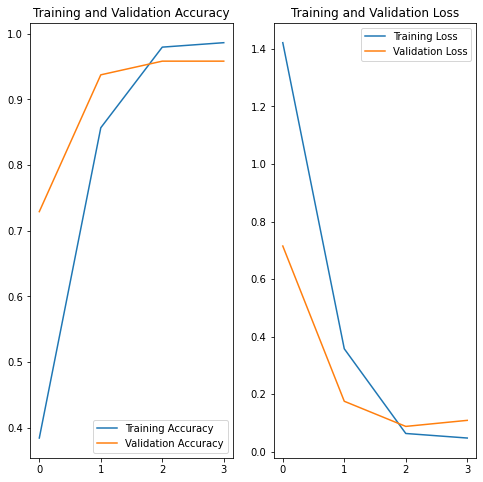

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Сохраним обученную модель

In [20]:
model.save('model.h5')

### Далее можно работать с уже обученной моделью, в папке с тестовыми данными по 20 изображений в кажом классе, определим процент правильных ответов в каждом классе

In [16]:
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
model = load_model('model.h5')

model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False, name='categorical_crossentropy'),
                  metrics=['accuracy'])
def predictImage(path):
    img = cv2.imread(path)
    img = cv2.resize(img,(480,480))
    img = np.reshape(img,[1,480,480,3])
    classes = model.predict(img)
#     print(max(classes))
    return classes

import os
for i in range(0, 6):
    print('class: ' + str(i))
    pred_true = 0
    pred_all = 0
    for filename in os.listdir('data/test/class_' + str(i) + '/'):
        pred_all = pred_all + 1
        arr = predictImage("data/test/class_" + str(i) + "/"+filename)
        if arr[0][i] >= 1:
            pred_true += 1
    print( str(round(pred_true /  pred_all * 100, 2)) + "%")


8/8 [==============================] - 2s 231ms/step - loss: 1.0724 - accuracy: 0.6083
class: 0
95.0%
class: 1
15.0%
class: 2
95.0%
class: 3
100.0%
class: 4
20.0%
class: 5
75.0%


### Для тестирования исползуется функция predictImage(path), объявленная выше.
#### Например:

In [29]:

path = "data/test/class_0/19.jpg"
print(predictImage(path))

[[1. 0. 0. 0. 0. 0.]]


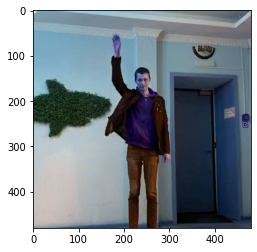

In [30]:
plt.imshow(cv2.imread(path))